Basic Statistics
             price
count     3.000000
mean    906.536667
std     230.879623
min     679.000000
25%     789.495000
50%     899.990000
75%    1020.305000
max    1140.620000
Mediana de precios: 899.99
Moda de precios: 679.0
Varianza de precios: 53305.400233333305
Desviación estándar de precios: 230.87962281962717
Coeficiente de variación de precios: 0.2546831598864843
Percentil 25% de precios: 789.495
Percentil 75% de precios: 1020.305
Percentil 90% de precios: 1092.494


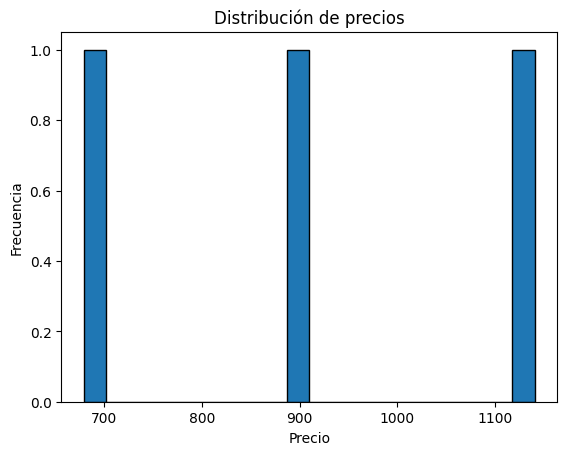

Productos más caros
               title                                        description  \
1  Acer Nitro 5 A...  Acer Nitro 5 AN515-51, 15.6" FHD IPS, Core i7-...   
2             Iphone                                             Silver   
0   Dell Inspiron...  Dell Inspiron 15 (5567) Fog Gray, 15.6" FHD, C...   

     price  
1  1140.62  
2   899.99  
0   679.00  


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def load_data(file_path):
    """
    Carga los datos desde un archivo CSV.
    
    Args:
        file_path (str): La ruta del archivo CSV.
    
    Returns:
        pd.DataFrame: DataFrame con los datos cargados.
    """
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"El archivo {file_path} no existe.")
    
    try:
        return pd.read_csv(file_path)
    except pd.errors.EmptyDataError:
        print("El archivo CSV está vacío.")
    except pd.errors.ParserError:
        print("Error al parsear el archivo CSV.")
    except Exception as e:
        print(f"Ocurrió un error al leer el archivo: {e}")
    
    return pd.DataFrame()

def display_basic_statistics(df):
    """
    Muestra estadísticas básicas del DataFrame.
    
    Args:
        df (pd.DataFrame): El DataFrame de pandas con los datos.
    """
    print("Basic Statistics")
    print(df.describe())

def display_additional_statistics(df):
    """
    Muestra estadísticas adicionales del DataFrame.
    
    Args:
        df (pd.DataFrame): El DataFrame de pandas con los datos.
    """
    median_price = df["price"].median()
    mode_price = df["price"].mode()[0]
    variance_price = df["price"].var()
    std_dev_price = df["price"].std()
    coeff_var_price = std_dev_price / df["price"].mean()
    q1_price = df["price"].quantile(0.25)
    q3_price = df["price"].quantile(0.75)
    p90_price = df["price"].quantile(0.90)
    
    
    
    print(f"Mediana de precios: {median_price}")
    print(f"Moda de precios: {mode_price}")
    print(f"Varianza de precios: {variance_price}")
    print(f"Desviación estándar de precios: {std_dev_price}")
    print(f"Coeficiente de variación de precios: {coeff_var_price}")
    print(f"Percentil 25% de precios: {q1_price}")
    print(f"Percentil 75% de precios: {q3_price}")
    print(f"Percentil 90% de precios: {p90_price}")
    

def plot_price_distribution(df):
    """
    Crea y muestra un histograma de la distribución de precios.
    
    Args:
        df (pd.DataFrame): El DataFrame de pandas con los datos.
    """
    plt.hist(df["price"], bins=20, edgecolor="black")
    plt.title("Distribución de precios")
    plt.xlabel("Precio")
    plt.ylabel("Frecuencia")
    plt.show()

def show_highest_prices(df, n=5):
    """
    Muestra los n productos más caros.
    
    Args:
        df (pd.DataFrame): El DataFrame de pandas con los datos.
        n (int): El número de productos más caros a mostrar.
    """
    print("Productos más caros")
    highest_prices = df.nlargest(n, 'price')
    print(highest_prices)

# Ejecución del flujo de trabajo
data_path = "../data/processed/cleaned_products.csv"
df = load_data(data_path)

# Validación de datos
required_columns = ["price"]
if not all(column in df.columns for column in required_columns):
    raise ValueError(f"El DataFrame no contiene las columnas requeridas: {required_columns}")

if df.empty:
    raise ValueError("El DataFrame está vacío.")

# Desplegar estadísticas y gráficos si los datos son válidos
display_basic_statistics(df)
display_additional_statistics(df)
plot_price_distribution(df)
show_highest_prices(df)
